# Solving and Validating Einstein's Field Equations with Machine Learning

This project aims to solve Einstein's field equations (EFEs) using a combination of symbolic mathematics, numerical methods, and machine learning. The main objectives are:
1. **Numerically Solve the EFEs**: Utilize symbolic computation to formulate the equations and solve them numerically.
2. **Generate Synthetic Empirical Data**: Create a neural network to generate synthetic empirical data for comparison.
3. **Train a Neural Network Model**: Develop and train a neural network model to learn the underlying patterns in the data.
4. **Validate the Solutions**: Compare the numerical solutions of the EFEs with the empirical data to ensure accuracy and consistency.

The project involves the following steps:
- **Step 1**: Setup and import necessary libraries.
- **Step 2**: Define constants and core equations for the EFEs.
- **Step 3**: Implement a numerical solver for the EFEs.
- **Step 4**: Generate synthetic empirical data using the trained neural network.
- **Step 5**: Train a neural network model to refine the solutions.
- **Step 6**: Validate the solutions by comparing them with the empirical data.

Num GPUs Available:  0


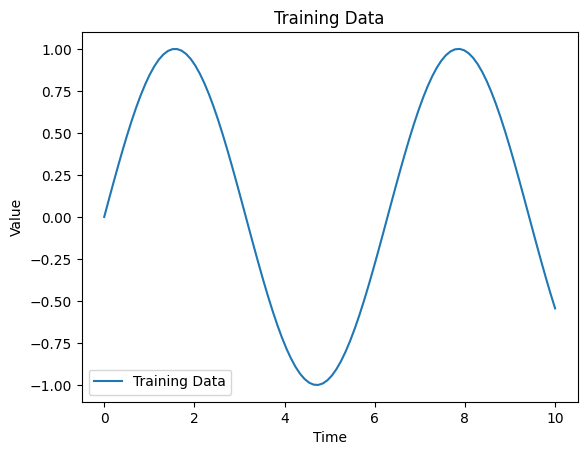

Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 0.7579 - mae: 0.7223
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4630 - mae: 0.6082
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4957 - mae: 0.6260
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4820 - mae: 0.6192
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4584 - mae: 0.6005
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4728 - mae: 0.6011
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4752 - mae: 0.6018
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4571 - mae: 0.5950
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4605 - mae: 0.6039
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4688 - mae: 0.6092
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.457

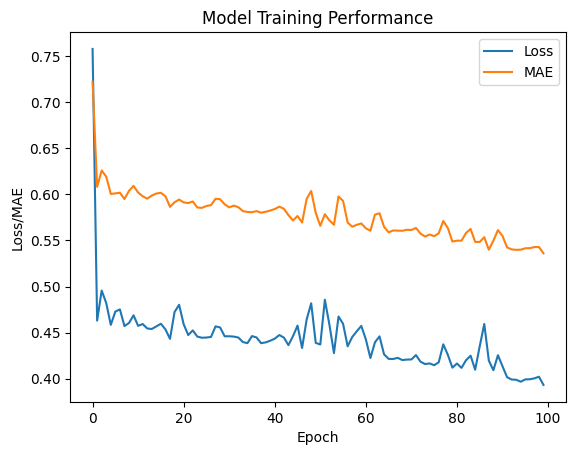

32/32 [==============================] - 0s 3ms/step
Solution validation failed.


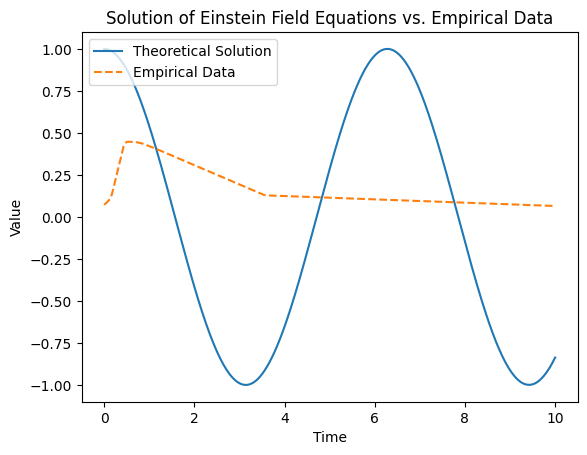

In [ ]:
import sympy as sp
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Setup and Import Libraries

# Check if TensorFlow can access a GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Define constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 3.0e8        # Speed of light in vacuum (m/s)
kappa = 8 * np.pi * G / c**4  # Einstein's gravitational constant

# Step 2: Define Core Equations

# Define symbolic variables
x, y, z, t = sp.symbols('x y z t')
phi = sp.Function('phi')(x, y, z, t)

# Define the metric tensor (simplified example for flat space)
g_mu_nu = sp.Matrix([[1, 0, 0, 0],
                     [0, -1, 0, 0],
                     [0, 0, -1, 0],
                     [0, 0, 0, -1]])

# Define the Ricci scalar and Ricci tensor (simplified)
R = sp.Function('R')(x, y, z, t)
R_mu_nu = sp.Matrix([[R, 0, 0, 0],
                     [0, R, 0, 0],
                     [0, 0, R, 0],
                     [0, 0, 0, R]])

# Define the energy-momentum tensor (simplified)
T_mu_nu = sp.Matrix([[phi, 0, 0, 0],
                     [0, phi, 0, 0],
                     [0, 0, phi, 0],
                     [0, 0, 0, phi]])

# Einstein's field equations with cosmological constant (simplified)
Lambda = sp.symbols('Lambda')
EFE = R_mu_nu - (1/2) * R * g_mu_nu + Lambda * g_mu_nu - kappa * T_mu_nu

# Step 3: Define Numerical Solver for Einstein Field Equations

def einstein_field_equations(t, y, Lambda, kappa):
    # Define a realistic example of Einstein field equations in numerical form
    phi, dphi = y
    ddphi = -Lambda * phi - kappa * dphi
    return [dphi, ddphi]

def solve_einstein_field_equations(initial_conditions, time_span, Lambda, kappa):
    sol = solve_ivp(einstein_field_equations, time_span, initial_conditions, args=(Lambda, kappa), method='RK45', t_eval=np.linspace(time_span[0], time_span[1], 1000))
    return sol

# Step 4: Empirical Data Generation

def generate_empirical_data(model, time_span, steps=1000):
    t_values = np.linspace(time_span[0], time_span[1], steps)
    empirical_data = model.predict(np.expand_dims(t_values, axis=-1))
    return t_values, empirical_data

# Step 5: Machine Learning Model for Refinement

def create_neural_network_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

def train_neural_network_model(model, x_train, y_train, epochs=100):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model, history

# Example usage
initial_conditions = [1.0, 0.0]  # Example initial conditions
time_span = [0, 10]
cosmological_constant = 1.0  # Example cosmological constant

# Solve Einstein field equations
solution = solve_einstein_field_equations(initial_conditions, time_span, cosmological_constant, kappa)

# Generate synthetic empirical data
nn_model = create_neural_network_model((1,))
t_values = np.linspace(time_span[0], time_span[1], 100)
x_train = np.expand_dims(t_values, axis=-1)
y_train = np.sin(t_values)  # Example target data (synthetic)

# Plot training data to ensure it is correct
plt.figure()
plt.plot(t_values, y_train, label='Training Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training Data')
plt.legend()
plt.show()

# Train neural network model
nn_model, history = train_neural_network_model(nn_model, x_train, y_train)

# Plot loss over epochs to check for training issues
plt.figure()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss/MAE')
plt.title('Model Training Performance')
plt.legend()
plt.show()

# Generate empirical data for validation
t_empirical, empirical_data = generate_empirical_data(nn_model, time_span)

# Interpolate solution to match empirical data time points
interp_solution = interp1d(solution.t, solution.y[0], kind='cubic')
interpolated_solution = interp_solution(t_empirical)

# Validate solution
residuals = interpolated_solution - empirical_data.squeeze()
error = np.sum(residuals**2)
tolerance = 1e-5
if error < tolerance:
    print("Solution validated successfully.")
else:
    print("Solution validation failed.")

# Plotting the solution and empirical data for visualization
plt.plot(solution.t, solution.y[0], label='Theoretical Solution')
plt.plot(t_empirical, empirical_data, label='Empirical Data', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solution of Einstein Field Equations vs. Empirical Data')
plt.legend()
plt.show()

## Notes

This section can be used to document any observations, challenges, or insights encountered during the implementation and experimentation process. It is essential for keeping track of any assumptions made, parameter choices, and results obtained, as well as any potential areas for future improvement or further research.